In [1]:
import os
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from matplotlib.patches import Rectangle
from shapely.geometry import box

In [2]:
possible_splits=["train","test","valid"]

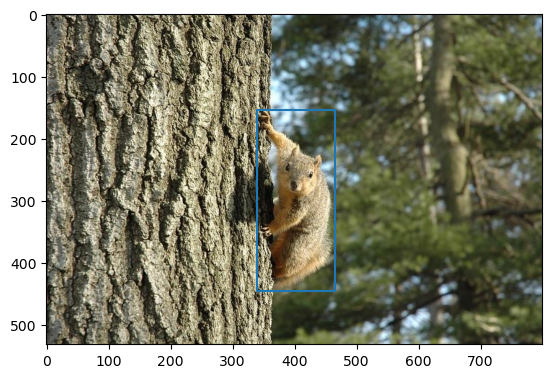

In [25]:
datadir="squirrels-lyyup_robin_squirrels/test"
annotation_path=os.path.join(datadir,"_annotations.coco.json")

with open(annotation_path,"r") as f:
    annotation_json=json.load(f)

images=annotation_json['images']
annotations=annotation_json['annotations']

idx=19

cur_img=images[idx]
imgpath=os.path.join(datadir,cur_img['file_name'])
img=cv2.imread(imgpath)[:,:,[2,1,0]]

cur_ann=annotations[idx]
category_id=cur_ann['category_id']
[x1,y1,w,h]=cur_ann['bbox']
x2=x1+w
y2=y1+h

bbox=box(x1,y1,x2,y2)

plt.imshow(img)
plt.plot(*bbox.exterior.xy)